#Binary Logistic Regression for the UCI Ionosphere

In [124]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
#loading dataset
D=pd.read_csv('/content/ionosphere_data_kaggle.csv')

In [126]:
D

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [127]:
#checking feature and label names
D.columns

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature17', 'feature18', 'feature19', 'feature20', 'feature21',
       'feature22', 'feature23', 'feature24', 'feature25', 'feature26',
       'feature27', 'feature28', 'feature29', 'feature30', 'feature31',
       'feature32', 'feature33', 'feature34', 'label'],
      dtype='object')

In [128]:
D.shape

(351, 35)

In [129]:
#features
X=D.iloc[:,0:34]
X

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [130]:
#label
Y=D['label']
Y

0      g
1      b
2      g
3      b
4      g
      ..
346    g
347    g
348    g
349    g
350    g
Name: label, Length: 351, dtype: object

In [131]:
#converting categorical label into 0 and 1
Y[np.where(D=='b')[0]] = 1
Y[np.where(D=='g')[0]] = 0
Y= Y.astype(np.int64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [132]:
Y

0      0
1      1
2      0
3      1
4      0
      ..
346    0
347    0
348    0
349    0
350    0
Name: label, Length: 351, dtype: int64

In [133]:
#spliting the dataset in train and test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
trainx, testx, trainy, testy = train_test_split(
X ,Y, test_size=0.1, random_state=0)

In [134]:
trainx, testx, trainy, testy

(     feature1  feature2  feature3  ...  feature32  feature33  feature34
 76          1         0   1.00000  ...    0.63636    0.40442    0.62658
 198         1         0   0.36876  ...    0.00108    0.00015    0.00325
 171         1         0   1.00000  ...   -0.11111    1.00000    0.00000
 20          1         0   1.00000  ...   -0.40575    0.74354   -0.45039
 281         1         0   0.94331  ...   -0.17921   -0.66932   -0.34367
 ..        ...       ...       ...  ...        ...        ...        ...
 323         1         0   0.39394  ...    0.06410    0.39394    0.24242
 192         1         0   0.00000  ...   -0.27083   -0.19792   -0.93750
 117         1         0   0.98182  ...    0.16465    0.58840    0.17077
 47          1         0   0.94598  ...    0.20477   -0.06117    0.41913
 172         0         0   0.00000  ...    1.00000    0.00000    0.00000
 
 [315 rows x 34 columns],
      feature1  feature2  feature3  ...  feature32  feature33  feature34
 6           1         

In [135]:
trainx

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
76,1,0,1.00000,0.04078,1.00000,0.11982,1.00000,0.16159,1.00000,0.27921,0.98703,0.30889,0.92745,0.37639,0.91118,0.39749,0.81939,0.46059,0.78619,0.46994,0.79400,0.56282,0.70331,0.58129,0.67077,0.59723,0.58903,0.60990,0.53952,0.60932,0.45312,0.63636,0.40442,0.62658
198,1,0,0.36876,-1.00000,-1.00000,-1.00000,-0.07661,1.00000,1.00000,0.95041,0.74597,-0.38710,-1.00000,-0.79313,-0.09677,1.00000,0.48684,0.46502,0.31755,-0.27461,-0.14343,-0.20188,-0.11976,0.06895,0.03021,0.06639,0.03443,-0.01186,-0.00403,-0.01672,-0.00761,0.00108,0.00015,0.00325
171,1,0,1.00000,0.00000,1.00000,0.00000,0.66667,0.11111,1.00000,-0.11111,0.88889,-0.11111,1.00000,-0.22222,0.77778,0.00000,0.77778,0.00000,1.00000,-0.11111,0.77778,-0.11111,0.66667,-0.11111,0.66667,0.00000,0.90347,-0.05352,1.00000,0.11111,0.88889,-0.11111,1.00000,0.00000
20,1,0,1.00000,-0.00612,1.00000,-0.09834,1.00000,-0.07649,1.00000,-0.10605,1.00000,-0.11073,1.00000,-0.39489,1.00000,-0.15616,0.92124,-0.31884,0.86473,-0.34534,0.91693,-0.44072,0.96060,-0.46866,0.81874,-0.40372,0.82681,-0.42231,0.75784,-0.38231,0.80448,-0.40575,0.74354,-0.45039
281,1,0,0.94331,0.19959,0.96132,0.40803,0.80514,0.56569,0.56687,0.70830,0.41836,0.83230,0.14939,0.89489,0.05167,0.93682,-0.24742,0.83939,-0.42811,0.75554,-0.50251,0.62563,-0.65515,0.50428,-0.68851,0.30912,-0.77097,0.15619,-0.75406,-0.04399,-0.75199,-0.17921,-0.66932,-0.34367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,1,0,0.39394,-0.24242,0.62655,0.01270,0.45455,0.09091,0.63636,0.09091,0.21212,-0.21212,0.57576,0.15152,0.39394,0.00000,0.56156,0.04561,0.51515,0.03030,0.78788,0.18182,0.30303,-0.15152,0.48526,0.05929,0.46362,0.06142,0.33333,-0.03030,0.41856,0.06410,0.39394,0.24242
192,1,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,-0.33333,0.16667,0.26042,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.19792,-0.21875,-0.16667,0.90625,-1.00000,0.50000,0.04167,0.75000,-0.22917,-1.00000,-0.12500,-0.27083,-0.19792,-0.93750
117,1,0,0.98182,0.00000,0.88627,0.03131,0.86249,0.04572,0.80000,0.00000,0.69091,0.04545,0.79343,0.08436,0.77118,0.09579,0.62727,0.25455,0.68182,0.12727,0.70674,0.12608,0.68604,0.13493,0.74545,0.22727,0.64581,0.15088,0.67273,0.02727,0.60715,0.16465,0.58840,0.17077
47,1,0,0.94598,-0.02685,-1.00000,0.26131,-0.36393,0.35639,0.69258,-0.63427,1.00000,-0.03353,-0.29020,-0.00550,-0.54852,0.15452,0.91921,-0.46270,1.00000,-0.50424,-0.29735,-0.31454,-0.73864,0.37361,0.83872,-0.46734,0.52208,-0.58130,1.00000,-0.61393,-0.09634,0.20477,-0.06117,0.41913


In [136]:
trainx.isnull()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
76,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
171,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
281,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
192,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
117,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
47,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [137]:
trainx.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,315.000000,315.0,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,0.892063,0.0,0.630818,0.034643,0.605524,0.113384,0.558050,0.118122,0.508289,0.185350,0.472311,0.146270,0.400282,0.103843,0.344726,0.065298,0.381645,0.000599,0.360067,-0.019576,0.347533,0.010754,0.368236,-0.061284,0.409883,-0.071186,0.542204,-0.062268,0.397120,-0.036432,0.357259,-0.008864,0.367381,0.008301
std,0.310794,0.0,0.510101,0.437257,0.508032,0.456125,0.486066,0.525162,0.508777,0.486883,0.557945,0.485426,0.622404,0.494883,0.651762,0.463723,0.622455,0.485944,0.628319,0.514491,0.609540,0.523141,0.602822,0.525709,0.575490,0.504391,0.520288,0.539591,0.564437,0.492561,0.567831,0.506123,0.521813,0.472472
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.469375,-0.064735,0.418075,-0.024520,0.253305,-0.056135,0.098835,-0.045855,0.013730,-0.063730,0.000000,-0.063345,0.000000,-0.088925,0.000000,-0.214265,0.000000,-0.211255,0.000000,-0.251480,0.000000,-0.378775,0.000000,-0.332390,0.290590,-0.407115,0.000000,-0.233380,0.000000,-0.236895,0.000000,-0.184910
50%,1.000000,0.0,0.868890,0.011050,0.805620,0.019540,0.727270,0.014710,0.669380,0.016810,0.651640,0.025750,0.628900,0.043100,0.593610,0.000000,0.604590,0.000000,0.582120,0.000000,0.524940,0.000000,0.534480,0.000000,0.561210,-0.015350,0.716980,-0.017680,0.526130,0.000000,0.451140,0.000000,0.431370,0.000000
75%,1.000000,0.0,1.000000,0.186235,1.000000,0.332380,0.976880,0.466830,0.949280,0.575670,0.957895,0.463600,0.957240,0.395975,0.920050,0.294635,0.936795,0.187395,0.899265,0.121775,0.911575,0.189915,0.920820,0.158615,0.910925,0.150285,0.999155,0.148805,0.889915,0.130740,0.852930,0.187585,0.832195,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Calculating  mean and variance for all features

In [138]:
np.mean(trainx)

feature1     0.892063
feature2     0.000000
feature3     0.630818
feature4     0.034643
feature5     0.605524
feature6     0.113384
feature7     0.558050
feature8     0.118122
feature9     0.508289
feature10    0.185350
feature11    0.472311
feature12    0.146270
feature13    0.400282
feature14    0.103843
feature15    0.344726
feature16    0.065298
feature17    0.381645
feature18    0.000599
feature19    0.360067
feature20   -0.019576
feature21    0.347533
feature22    0.010754
feature23    0.368236
feature24   -0.061284
feature25    0.409883
feature26   -0.071186
feature27    0.542204
feature28   -0.062268
feature29    0.397120
feature30   -0.036432
feature31    0.357259
feature32   -0.008864
feature33    0.367381
feature34    0.008301
dtype: float64

In [139]:
np.var(trainx)

feature1     0.096286
feature2     0.000000
feature3     0.259377
feature4     0.190587
feature5     0.257277
feature6     0.207390
feature7     0.235510
feature8     0.274920
feature9     0.258032
feature10    0.236303
feature11    0.310315
feature12    0.234891
feature13    0.386157
feature14    0.244132
feature15    0.423445
feature16    0.214356
feature17    0.386221
feature18    0.235392
feature19    0.393531
feature20    0.263861
feature21    0.370360
feature22    0.272808
feature23    0.362241
feature24    0.275493
feature25    0.330137
feature26    0.253603
feature27    0.269840
feature28    0.290234
feature29    0.317578
feature30    0.241846
feature31    0.321408
feature32    0.255347
feature33    0.271424
feature34    0.222522
dtype: float64

Ploting histograms and box plots for the 5 features with the
highest variance.

In [140]:
trainx['feature15' ]

76     0.91118
198   -0.09677
171    0.77778
20     1.00000
281    0.05167
        ...   
323    0.39394
192    0.00000
117    0.77118
47    -0.54852
172    0.00000
Name: feature15, Length: 315, dtype: float64

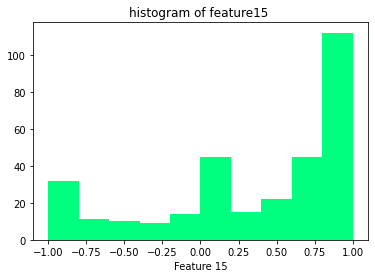

In [141]:
#histogram
plt.hist(trainx['feature15'], color='springgreen')
plt.title("histogram of feature15 " )
plt.xlabel('Feature 15')
plt.show()


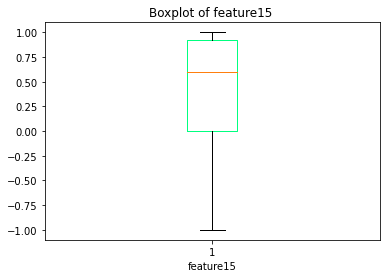

In [142]:
# boxplot
plt.boxplot(trainx['feature15'], boxprops=dict(color='springgreen'))
plt.title('Boxplot of feature15 ')
plt.xlabel('feature15')
plt.show()

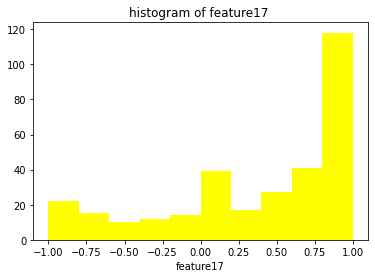

In [143]:
#histogram
plt.hist(trainx['feature17'], color='yellow')
plt.title("histogram of feature17 " )
plt.xlabel('feature17')
plt.show()

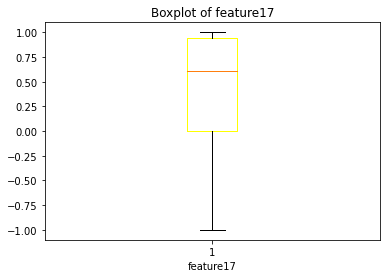

In [144]:
# boxplot
plt.boxplot(trainx['feature17'], boxprops=dict(color='yellow'))
plt.title('Boxplot of feature17')
plt.xlabel('feature17')
plt.show()

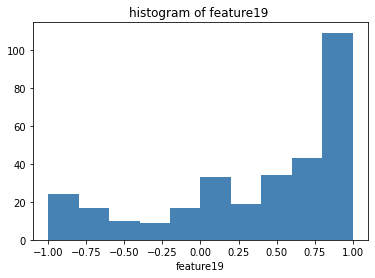

In [145]:
#histogram
plt.hist(trainx['feature19'], color='steelblue')
plt.title("histogram of feature19 " )
plt.xlabel('feature19')
plt.show()

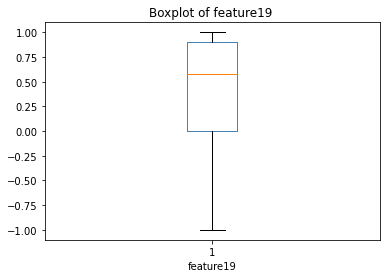

In [146]:
# boxplot
plt.boxplot(trainx['feature19'], boxprops=dict(color='steelblue'))
plt.title('Boxplot of feature19 ')
plt.xlabel('feature19')
plt.show()

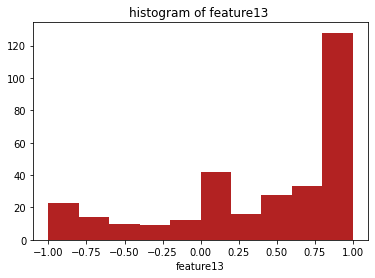

In [147]:
#histogram
plt.hist(trainx['feature13'], color='firebrick')
plt.title("histogram of feature13 " )
plt.xlabel('feature13')
plt.show()

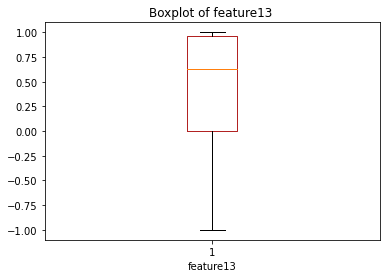

In [148]:
# boxplot
plt.boxplot(trainx['feature13'], boxprops=dict(color='firebrick'))
plt.title('Boxplot of feature13 ')
plt.xlabel('feature13')
plt.show()

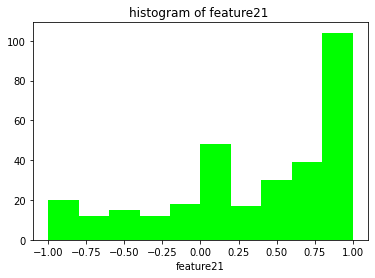

In [149]:
#histogram
plt.hist(trainx['feature21'], color='lime')
plt.title("histogram of feature21 " )
plt.xlabel('feature21')
plt.show()

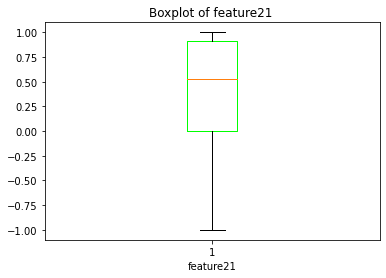

In [150]:
# boxplot
plt.boxplot(trainx['feature21'], boxprops=dict(color='lime'))
plt.title('Boxplot of feature21 ')
plt.xlabel('feature21')
plt.show()

Feature Normalization

In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trainx = scaler.fit_transform(trainx)
testx = scaler.transform(testx)

In [152]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer().fit(trainx)  
normalizer = preprocessing.Normalizer().fit(testx) 
normalizer.transform(testx)
normalizer.transform(trainx)

array([[ 0.0754467 ,  0.        ,  0.15722753, ...,  0.27694872,
         0.01542021,  0.28428419],
       [ 0.04922183,  0.        , -0.07281197, ...,  0.00278476,
        -0.09974389, -0.00151506],
       [ 0.10053696,  0.        ,  0.20951451, ..., -0.05848148,
         0.35095987, -0.00508584],
       ...,
       [ 0.1396092 ,  0.        ,  0.2766123 , ...,  0.1378155 ,
         0.17026809,  0.13823351],
       [ 0.05662776,  0.        ,  0.10074211, ...,  0.06882544,
        -0.13391251,  0.14178118],
       [-0.37628498,  0.        , -0.16212175, ...,  0.26131878,
        -0.09229867, -0.00230317]])

In [153]:
trainx

array([[ 0.34784543,  0.        ,  0.72489425, ...,  1.27686634,
         0.07109454,  1.31068636],
       [ 0.34784543,  0.        , -0.5145545 , ...,  0.01967961,
        -0.70487953, -0.01070674],
       [ 0.34784543,  0.        ,  0.72489425, ..., -0.20233868,
         1.21427765, -0.01759639],
       ...,
       [ 0.34784543,  0.        ,  0.68919756, ...,  0.3433763 ,
         0.42423405,  0.34441779],
       [ 0.34784543,  0.        ,  0.61882521, ...,  0.42277174,
        -0.8225799 ,  0.87091449],
       [-2.87484015,  0.        , -1.23862002, ...,  1.99649136,
        -0.70516744, -0.01759639]])

In [154]:
testx 

array([[ 0.34784543,  0.        ,  0.67753429, ..., -1.59169941,
        -0.97066509, -1.73418001],
       [ 0.34784543,  0.        ,  0.72489425, ..., -0.66887591,
         1.21427765,  0.72108043],
       [ 0.34784543,  0.        ,  0.55510917, ...,  0.01754235,
        -0.70516744, -0.01759639],
       ...,
       [ 0.34784543,  0.        ,  0.67515843, ...,  1.55522531,
        -0.90265915,  1.55625481],
       [ 0.34784543,  0.        , -1.07500038, ..., -1.96140666,
        -2.62461253,  1.28524764],
       [ 0.34784543,  0.        ,  0.72489425, ..., -0.42892834,
         0.96496092, -0.51144674]])

In [155]:
trainy.shape

(315,)

Implimenting binary logistic regression using sklearn

In [156]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression() #buildig model
logistic_model.fit(trainx,trainy)
pred_y = logistic_model.predict(testx)

checking the accuracy of the model in the training set

In [157]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [158]:
test_acc = accuracy_score(testy, pred_y)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 94.44444444444444


In [159]:
#generating classification report
from sklearn.metrics import classification_report
print(classification_report(testy,pred_y))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.86      0.92        14

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



Implimenting kfold

In [160]:

# evaluating  logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

CV = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(logistic_model, trainx, trainy, scoring='accuracy', cv=CV, n_jobs=-1)

In [162]:
scores

array([0.85714286, 0.88888889, 0.85714286, 0.92063492, 0.82539683])

In [161]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.870 (0.032)


In [ ]:
#Getting the classification report for each folds

In [215]:
def Classification_report(y_true, y_pred):

    print (classification_report(testy, pred_y)) 
    return accuracy_score(testy, y_pred) 

In [165]:
from sklearn.metrics import  make_scorer
nestedscore = cross_val_score(logistic_model,trainx, trainy, cv=CV, \
               scoring=make_scorer(Classification_report))
print(nestedscore) 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.86      0.92        14

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.86      0.92        14

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.86      0.92        14

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

              preci

#Reducing the number of features via Principal Component Analysis (PCA)

In [218]:
#loading dataset
pca_data=pd.read_csv('/content/ionosphere_data_kaggle.csv')

In [219]:
pca_data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [220]:
#checking feature and label names
pca_data.columns

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature17', 'feature18', 'feature19', 'feature20', 'feature21',
       'feature22', 'feature23', 'feature24', 'feature25', 'feature26',
       'feature27', 'feature28', 'feature29', 'feature30', 'feature31',
       'feature32', 'feature33', 'feature34', 'label'],
      dtype='object')

In [221]:
#features
x=pca_data.iloc[:,0:34]
x

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [222]:
#label
y=pca_data['label']
y

0      g
1      b
2      g
3      b
4      g
      ..
346    g
347    g
348    g
349    g
350    g
Name: label, Length: 351, dtype: object

In [223]:
#converting categorical label into 0 and 1
y[np.where(pca_data=='b')[0]] = 1
y[np.where(pca_data=='g')[0]] = 0
y= y.astype(np.int64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [224]:
y

0      0
1      1
2      0
3      1
4      0
      ..
346    0
347    0
348    0
349    0
350    0
Name: label, Length: 351, dtype: int64

In [225]:
#spliting the dataset in train and test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
Trainx, Testx, Trainy, Testy = train_test_split(
x ,y, test_size=0.1, random_state=0)

In [226]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Trainx = scaler.fit_transform(Trainx)
Testx = scaler.transform(Testx)

In [227]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer().fit(Trainx)  
normalizer = preprocessing.Normalizer().fit(Testx) 
normalizer.transform(Testx)
normalizer.transform(Trainx)

array([[ 0.0754467 ,  0.        ,  0.15722753, ...,  0.27694872,
         0.01542021,  0.28428419],
       [ 0.04922183,  0.        , -0.07281197, ...,  0.00278476,
        -0.09974389, -0.00151506],
       [ 0.10053696,  0.        ,  0.20951451, ..., -0.05848148,
         0.35095987, -0.00508584],
       ...,
       [ 0.1396092 ,  0.        ,  0.2766123 , ...,  0.1378155 ,
         0.17026809,  0.13823351],
       [ 0.05662776,  0.        ,  0.10074211, ...,  0.06882544,
        -0.13391251,  0.14178118],
       [-0.37628498,  0.        , -0.16212175, ...,  0.26131878,
        -0.09229867, -0.00230317]])

In [228]:
Testx

array([[ 0.34784543,  0.        ,  0.67753429, ..., -1.59169941,
        -0.97066509, -1.73418001],
       [ 0.34784543,  0.        ,  0.72489425, ..., -0.66887591,
         1.21427765,  0.72108043],
       [ 0.34784543,  0.        ,  0.55510917, ...,  0.01754235,
        -0.70516744, -0.01759639],
       ...,
       [ 0.34784543,  0.        ,  0.67515843, ...,  1.55522531,
        -0.90265915,  1.55625481],
       [ 0.34784543,  0.        , -1.07500038, ..., -1.96140666,
        -2.62461253,  1.28524764],
       [ 0.34784543,  0.        ,  0.72489425, ..., -0.42892834,
         0.96496092, -0.51144674]])

In [229]:
from sklearn.decomposition import PCA

In [230]:
pca = PCA(.95)

In [231]:
pca.fit(Trainx)

PCA(n_components=0.95)

In [232]:
Trainx = pca.transform(Trainx)
Testx = pca.transform(Testx)

In [233]:
pca = PCA(n_components = 23)

In [234]:
pca.fit(Trainx)

PCA(n_components=23)

In [235]:
variance = pca.explained_variance_ratio_ #calculate variance ratios

In [236]:
variance

array([0.28442179, 0.13111603, 0.08563832, 0.07923287, 0.06267421,
       0.03875785, 0.03630604, 0.03313121, 0.02979528, 0.02660095,
       0.02367782, 0.02287812, 0.01878043, 0.01797256, 0.01683709,
       0.01508754, 0.01381885, 0.01250522, 0.0120595 , 0.01083628,
       0.01036504, 0.00918025, 0.00832674])

In [237]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var

array([ 28.4,  41.5,  50.1,  58. ,  64.3,  68.2,  71.8,  75.1,  78.1,
        80.8,  83.2,  85.5,  87.4,  89.2,  90.9,  92.4,  93.8,  95.1,
        96.3,  97.4,  98.4,  99.3, 100.1])

In [238]:
from sklearn.linear_model import LogisticRegression
Logistic_model = LogisticRegression() #buildig model
Logistic_model.fit(Trainx,Trainy)
pred_Y = Logistic_model.predict(Testx)

In [239]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [240]:
Test_acc = accuracy_score(Testy, pred_Y)
print("The Accuracy for Test Set is {}".format(Test_acc*100))

The Accuracy for Test Set is 94.44444444444444


In [241]:
#generating classification report
from sklearn.metrics import classification_report
print(classification_report(Testy,pred_Y))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.86      0.92        14

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



Implimenting kfold

In [242]:

# evaluating  logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

C_V = KFold(n_splits=5, random_state=1, shuffle=True)
Scores = cross_val_score(Logistic_model, Trainx, Trainy, scoring='accuracy', cv=C_V, n_jobs=-1)

In [243]:
Scores

array([0.85714286, 0.9047619 , 0.85714286, 0.9047619 , 0.87301587])

In [244]:
print('Accuracy: %.3f (%.3f)' % (mean(Scores), std(Scores)))

Accuracy: 0.879 (0.022)


In [245]:
#generating calssification report

In [248]:
def Classification_report(y_true, y_pred):

    print (classification_report(Testy, pred_Y)) 
    return accuracy_score(testy, y_pred) 

In [253]:
from sklearn.metrics import  make_scorer
nestedscore = cross_val_score(Logistic_model,trainx, trainy, cv=CV, \
               scoring=make_scorer(Classification_report))
print(nestedscore) 

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.86      0.92        14

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.86      0.92        14

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.86      0.92        14

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

              preci

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-248-96c3c49d1de0>", line 4, in Classification_report
    return accuracy_score(testy, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y

#Logistic Regression from scikit-learn with L1 and L2 regularization.

In [254]:
#loading dataset
log_data=pd.read_csv('/content/ionosphere_data_kaggle.csv')

In [255]:
log_data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [256]:
#features
features=log_data.iloc[:,0:34]
features

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [257]:
#label
label=log_data['label']
label

0      g
1      b
2      g
3      b
4      g
      ..
346    g
347    g
348    g
349    g
350    g
Name: label, Length: 351, dtype: object

In [258]:
#converting categorical label into 0 and 1
label[np.where(log_data=='b')[0]] = 1
label[np.where(log_data=='g')[0]] = 0
label= label.astype(np.int64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [259]:
label

0      0
1      1
2      0
3      1
4      0
      ..
346    0
347    0
348    0
349    0
350    0
Name: label, Length: 351, dtype: int64

In [260]:
#spliting the dataset in train and test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(
features ,label, test_size=0.1, random_state=0)

In [261]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [262]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer().fit(train_x)  
normalizer = preprocessing.Normalizer().fit(test_x) 
normalizer.transform(test_x)
normalizer.transform(train_x)

array([[ 0.0754467 ,  0.        ,  0.15722753, ...,  0.27694872,
         0.01542021,  0.28428419],
       [ 0.04922183,  0.        , -0.07281197, ...,  0.00278476,
        -0.09974389, -0.00151506],
       [ 0.10053696,  0.        ,  0.20951451, ..., -0.05848148,
         0.35095987, -0.00508584],
       ...,
       [ 0.1396092 ,  0.        ,  0.2766123 , ...,  0.1378155 ,
         0.17026809,  0.13823351],
       [ 0.05662776,  0.        ,  0.10074211, ...,  0.06882544,
        -0.13391251,  0.14178118],
       [-0.37628498,  0.        , -0.16212175, ...,  0.26131878,
        -0.09229867, -0.00230317]])

In [263]:
train_x

array([[ 0.34784543,  0.        ,  0.72489425, ...,  1.27686634,
         0.07109454,  1.31068636],
       [ 0.34784543,  0.        , -0.5145545 , ...,  0.01967961,
        -0.70487953, -0.01070674],
       [ 0.34784543,  0.        ,  0.72489425, ..., -0.20233868,
         1.21427765, -0.01759639],
       ...,
       [ 0.34784543,  0.        ,  0.68919756, ...,  0.3433763 ,
         0.42423405,  0.34441779],
       [ 0.34784543,  0.        ,  0.61882521, ...,  0.42277174,
        -0.8225799 ,  0.87091449],
       [-2.87484015,  0.        , -1.23862002, ...,  1.99649136,
        -0.70516744, -0.01759639]])

Implimenting logistic regression with L1 and L2 regularization

In [264]:
#building model= LogisticRegression(C=0.01, penalty='l1', tol=0.01,solver='liblinear')
L2 = LogisticRegression(C=0.01, penalty='l2', tol=0.01,solver='liblinear')


In [265]:
L1 = LogisticRegression(C=0.01, penalty='l1', tol=0.01,solver='liblinear')


In [266]:
L1.fit(train_x, train_y)


LogisticRegression(C=0.01, penalty='l1', solver='liblinear', tol=0.01)

In [267]:
L2.fit(train_x, train_y)

LogisticRegression(C=0.01, solver='liblinear', tol=0.01)

In [268]:
L1pred_y = L1.predict(test_x)

In [269]:
L1pred_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [270]:
L2pred_y = L2.predict(test_x)
L2pred_y

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [271]:
test_acc = accuracy_score(test_y, L1pred_y)
print("The Accuracy for Test Set with L1 regularization is {}".format(test_acc*100))

The Accuracy for Test Set with L1 regularization is 61.111111111111114


In [272]:
test_acc = accuracy_score(test_y, L2pred_y)
print("The Accuracy for Test Set with L2 regularization is {}".format(test_acc*100))

The Accuracy for Test Set with L2 regularization is 97.22222222222221


In [273]:
#generating classification report for L1 regularization
from sklearn.metrics import classification_report
print(classification_report(test_y,L1pred_y))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        22
           1       0.00      0.00      0.00        14

    accuracy                           0.61        36
   macro avg       0.31      0.50      0.38        36
weighted avg       0.37      0.61      0.46        36



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [274]:
#generating classification report for L2 regularization
from sklearn.metrics import classification_report
print(classification_report(test_y,L2pred_y))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.93      0.96        14

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



implimenting k fold

In [275]:

# evaluating  logistic regression model using k-fold cross-validation for L1
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

CV = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(L1, train_x, train_y, scoring='accuracy', cv=CV, n_jobs=-1)

In [276]:
scores

array([0.68253968, 0.53968254, 0.61904762, 0.6984127 , 0.68253968])

In [277]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.644 (0.059)


In [278]:
def Classification_report(y_true, y_pred):

    print (classification_report(test_y, L1pred_y)) 
    return accuracy_score(testy, y_pred) 

In [279]:
from sklearn.metrics import  make_scorer
nestedscore = cross_val_score(L1,train_x, train_y, cv=CV, \
               scoring=make_scorer(Classification_report))
print(nestedscore) 

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        22
           1       0.00      0.00      0.00        14

    accuracy                           0.61        36
   macro avg       0.31      0.50      0.38        36
weighted avg       0.37      0.61      0.46        36

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        22
           1       0.00      0.00      0.00        14

    accuracy                           0.61        36
   macro avg       0.31      0.50      0.38        36
weighted avg       0.37      0.61      0.46        36

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        22
           1       0.00      0.00      0.00        14

    accuracy                           0.61        36
   macro avg       0.31      0.50      0.38        36
weighted avg       0.37      0.61      0.46        36

              preci

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_val

In [281]:
# evaluating  logistic regression model using k-fold cross-validation for L1
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

CV = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(L2, train_x, train_y, scoring='accuracy', cv=CV, n_jobs=-1)

In [282]:
scores

array([0.88888889, 0.92063492, 0.85714286, 0.87301587, 0.84126984])

In [283]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.876 (0.027)


In [285]:
def Classification_report(y_true, y_pred):

    print (classification_report(test_y, L2pred_y)) 
    return accuracy_score(testy, y_pred) 

In [286]:
from sklearn.metrics import  make_scorer
nestedscore = cross_val_score(L2,train_x, train_y, cv=CV, \
               scoring=make_scorer(Classification_report))
print(nestedscore) 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.93      0.96        14

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.93      0.96        14

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.93      0.96        14

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36

              preci

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-285-f94e7316d765>", line 4, in Classification_report
    return accuracy_score(testy, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y

#ROC-AUC curve

In [290]:
plt.figure()
FPR = []
TPR = []

for threshold in np.arange(0, 1.1, 0.1):
    Logits = np.zeros(pred_y.shape[0])
    
    Logits[np.where(pred_y > threshold)] = 1
   
    tn, fp, fn, tp = confusion_matrix(testy, Logits).ravel()
    fpr = fp/(fp+tn)
    tpr = tp/(fn+tp)
    FPR.append(fpr)
    TPR.append(tpr)

<Figure size 432x288 with 0 Axes>

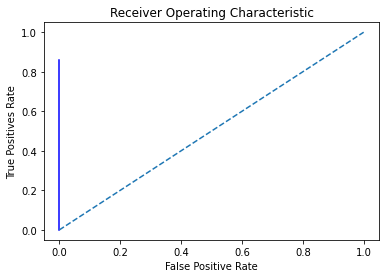

In [291]:
plt.title('Receiver Operating Characteristic')
plt.step(FPR, TPR, 'b')
plt.plot([0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positives Rate")
plt.show()

#Scikit-learn to plot the ROC-AUC curves

No handles with labels found to put in legend.


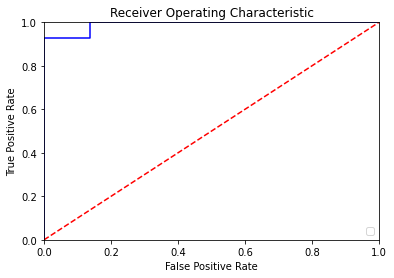

In [289]:
import sklearn.metrics as metrics

prob = logistic_model.predict_proba(Testx)
predict = prob[:,1]
Fpr, Tpr, threshold = metrics.roc_curve(testy, predict)
roc = metrics.auc(Fpr, Tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(Fpr, Tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
